<a href="https://colab.research.google.com/github/Yutthana-BJ/Data_Analytics_Projects/blob/main/Frasers_Property_Industrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib import cm
from google.colab import drive
drive.mount('/content/drive')
Environment_W1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Environment_W1.xlsx'
Solar_Consumption_W1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Solar_Consumption_W1.xlsx'
df = pd.read_excel(Solar_Consumption_W1)
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Plant,Datetime,Global Irradiation,Inverter Yield,Export Energy,Self Consumption
0,Warehouse W1,2022-04-01 00:00:00,0.0,0.0,0.0,0.0
1,Warehouse W1,2022-04-01 01:00:00,0.0,NaN,0.0,0.0
2,Warehouse W1,2022-04-01 02:00:00,0.0,NaN,0.0,0.0
3,Warehouse W1,2022-04-01 03:00:00,0.0,NaN,0.0,0.0
4,Warehouse W1,2022-04-01 04:00:00,0.0,NaN,0.0,0.0


In [52]:
df['Date'] = pd.to_datetime(df['Datetime'].dt.date)
df['Time'] = df['Datetime'].dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               2182 non-null   object        
 1   Datetime            2182 non-null   datetime64[ns]
 2   Global Irradiation  2163 non-null   float64       
 3   Inverter Yield      1424 non-null   float64       
 4   Export Energy       2163 non-null   float64       
 5   Self Consumption    2163 non-null   float64       
 6   Date                2182 non-null   datetime64[ns]
 7   Time                2182 non-null   object        
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 136.5+ KB


In [53]:
df[df.isnull().any(axis=1)]

,Plant,Datetime,Global Irradiation,Inverter Yield,Export Energy,Self Consumption,Date,Time
1,Warehouse W1,2022-04-01 01:00:00,0.0,NaN,0.0,0.0,2022-04-01,01:00:00
2,Warehouse W1,2022-04-01 02:00:00,0.0,NaN,0.0,0.0,2022-04-01,02:00:00
3,Warehouse W1,2022-04-01 03:00:00,0.0,NaN,0.0,0.0,2022-04-01,03:00:00
4,Warehouse W1,2022-04-01 04:00:00,0.0,NaN,0.0,0.0,2022-04-01,04:00:00
19,Warehouse W1,2022-04-01 19:00:00,0.0,NaN,0.0,0.0,2022-04-01,19:00:00
...,...,...,...,...,...,...,...,...
2162,Warehouse W1,2022-06-30 04:00:00,0.0,NaN,0.0,0.0,2022-06-30,04:00:00
2178,Warehouse W1,2022-06-30 20:00:00,0.0,NaN,0.0,0.0,2022-06-30,20:00:00
2179,Warehouse W1,2022-06-30 21:00:00,0.0,NaN,0.0,0.0,2022-06-30,21:00:00
2180,Warehouse W1,2022-06-30 22:00:00,0.0,NaN,0.0,0.0,2022-06-30,22:00:00


In [55]:
#
def GlobalIrradiation_MissingValue(row):
    if pd.isna(row['Global Irradiation']) and row['Inverter Yield'] == 0:
      return 0
    else:
        return row['Global Irradiation']

#
def InverterYield_MissingValue(row):
    if pd.isna(row['Inverter Yield']) and row['Global Irradiation'] == 0:
        return 0
    elif pd.isna(row['Inverter Yield']) and row['Global Irradiation'] != 0:
        return row['Global Irradiation']
    else:
        return row['Inverter Yield']

#
def SelfConsumption_MissingValue(row):
    if pd.isna(row['Self Consumption']) and row['Global Irradiation'] == 0:
        return 0
    else:
        return row['Self Consumption']

df['Global Irradiation'] = df.apply(GlobalIrradiation_MissingValue, axis=1)
df['Inverter Yield'] = df.apply(InverterYield_MissingValue, axis=1)
df['Self Consumption'] = df.apply(SelfConsumption_MissingValue, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               2182 non-null   object        
 1   Datetime            2182 non-null   datetime64[ns]
 2   Global Irradiation  2166 non-null   float64       
 3   Inverter Yield      2166 non-null   float64       
 4   Export Energy       2163 non-null   float64       
 5   Self Consumption    2166 non-null   float64       
 6   Date                2182 non-null   datetime64[ns]
 7   Time                2182 non-null   object        
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 136.5+ KB


<ipython-input-61-ce1ba611f003>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
<ipython-input-61-ce1ba611f003>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Time', y='Global Irradiation', palette=colors)
<ipython-input-61-ce1ba611f003>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=df, x='Time', y='Global Irradiation', palette=colors)
<ipython-input-61-ce1ba611f003>:6: UserWarning: The palette list has more values (2182) than needed (24), which may not be intended.
  sns.boxplot(data=df, x='Time', y='Global Irra

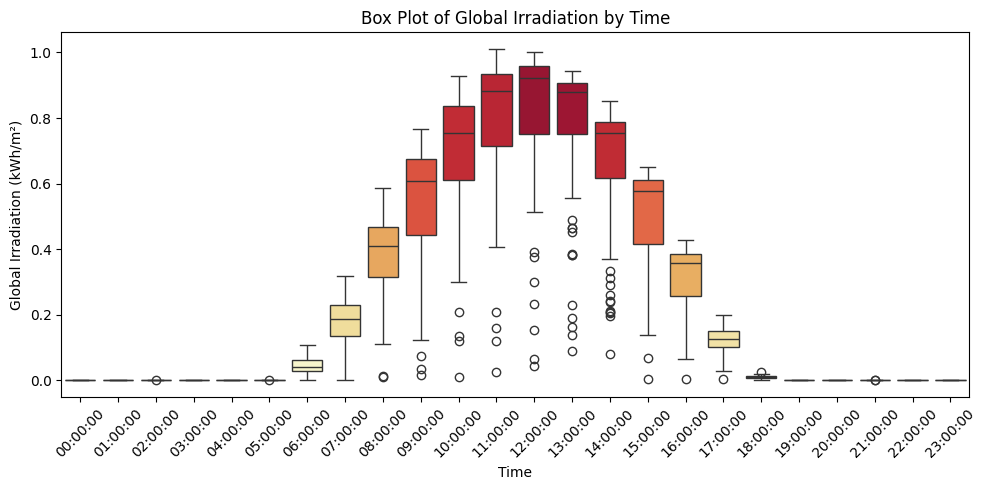

In [61]:
norm = Normalize(vmin=df['Global Irradiation'].min(), vmax=df['Global Irradiation'].max())
cmap = cm.get_cmap('YlOrRd')
colors = cmap(norm(df['Global Irradiation']))

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Time', y='Global Irradiation', palette=colors)
plt.title('Box Plot of Global Irradiation by Time')
plt.xlabel('Time')
plt.ylabel('Global Irradiation (kWh/m²)')
plt.xticks(rotation=45)
plt.tight_layout()

In [57]:
#
df['Global Irradiation'] = df.groupby('Time')['Global Irradiation'].transform(lambda x: x.fillna(x.median()))
df['Inverter Yield'] = df.groupby('Time')['Inverter Yield'].transform(lambda x: x.fillna(x.median()))
df['Self Consumption'] = df.groupby('Time')['Self Consumption'].transform(lambda x: x.fillna(x.median()))

#
def ExportEnergy_MissingValue(row):
    if pd.isna(row['Export Energy']):
        return row['Inverter Yield'] - row['Self Consumption']
    else:
        return row['Export Energy']

df['Export Energy'] = df.apply(ExportEnergy_MissingValue, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               2182 non-null   object        
 1   Datetime            2182 non-null   datetime64[ns]
 2   Global Irradiation  2182 non-null   float64       
 3   Inverter Yield      2182 non-null   float64       
 4   Export Energy       2182 non-null   float64       
 5   Self Consumption    2182 non-null   float64       
 6   Date                2182 non-null   datetime64[ns]
 7   Time                2182 non-null   object        
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 136.5+ KB


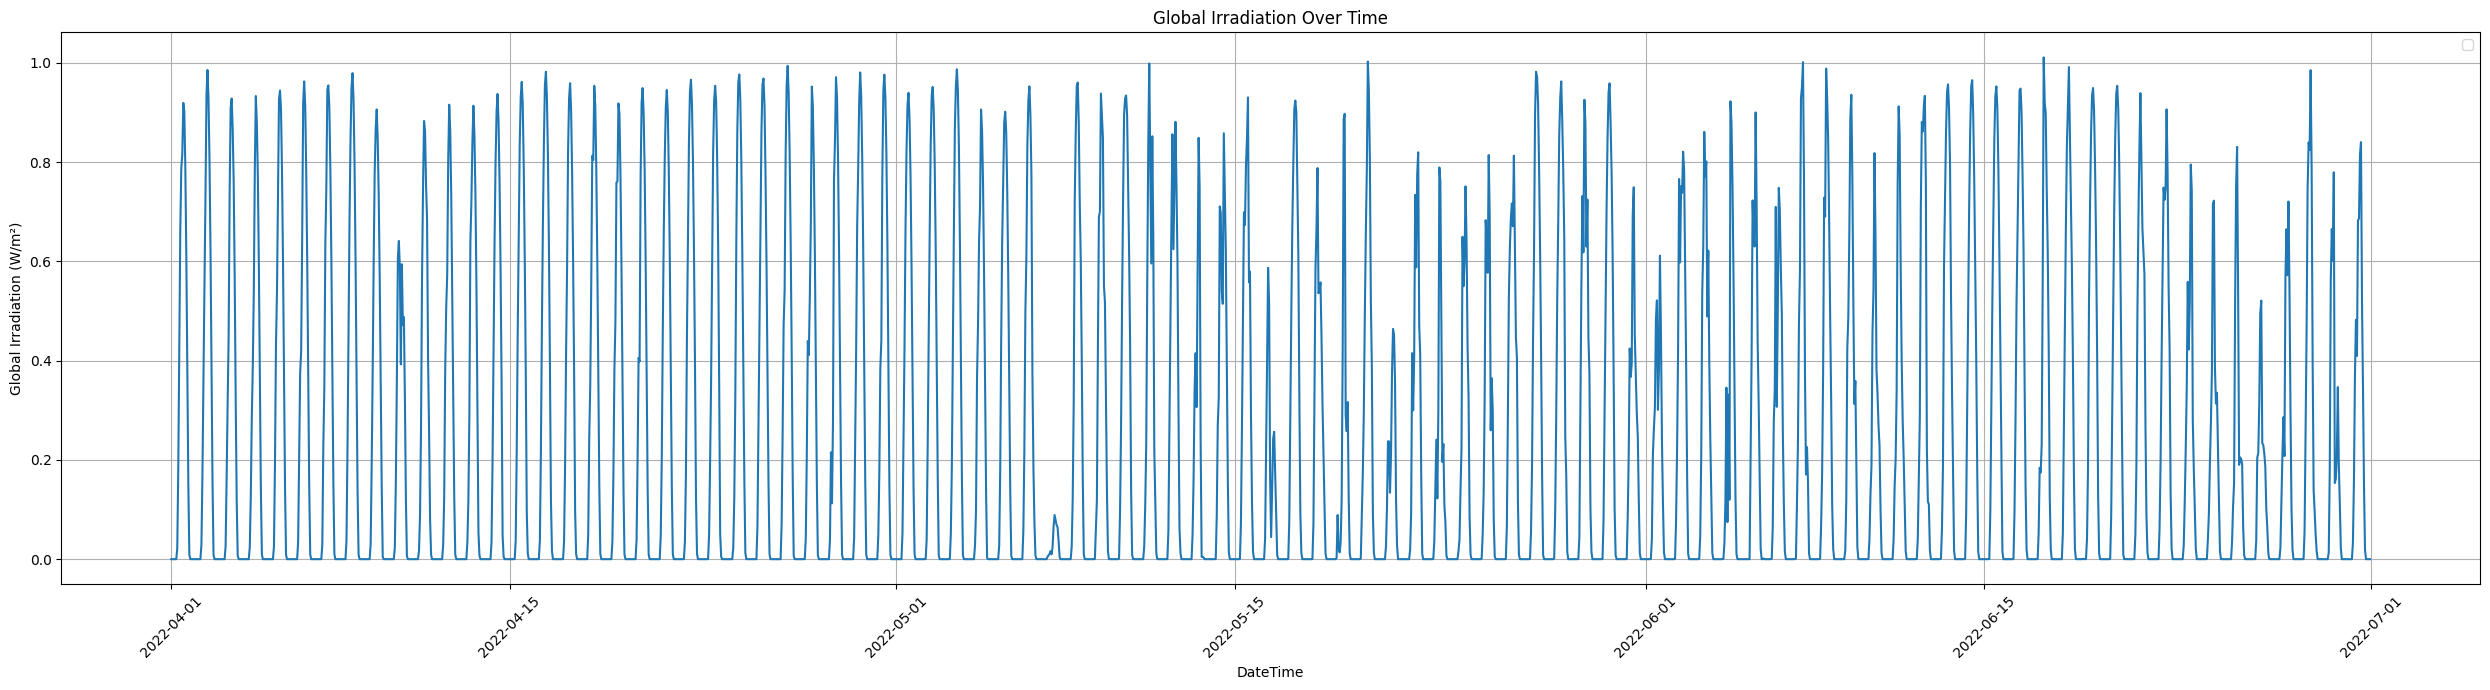

In [36]:
df_copy = df[['Datetime', 'Global Irradiation']]
df_copy.set_index('Datetime', inplace=True)

plt.figure(figsize=(25, 7))
plt.plot(df_copy['Global Irradiation'])
plt.title('Global Irradiation Over Time')
plt.xlabel('DateTime')
plt.ylabel('Global Irradiation (W/m²)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**2ND DataSet**

In [60]:
df_E_W1 = pd.read_excel(Environment_W1)
df['A'] = df['Device'].str[:12]
df['B'] = df['D'].str[13:]
df_E_W1

,Datetime,Device,Area,Humidity,Temperature
0,2022-04-01 00:00:00,warehouse_w1_ambient_f1,Inside,74.5,30.7
1,2022-04-01 00:10:00,warehouse_w1_ambient_f1,Inside,74.5,30.8
2,2022-04-01 00:15:00,warehouse_w1_ambient_f1,Inside,74.5,30.8
3,2022-04-01 00:20:00,warehouse_w1_ambient_f1,Inside,75.0,30.8
4,2022-04-01 00:30:00,warehouse_w1_ambient_f1,Inside,75.0,30.8
...,...,...,...,...,...
150932,2022-06-30 23:32:00,warehouse_w1_pillar_6m,Inside,74.0,29.3
150933,2022-06-30 23:42:00,warehouse_w1_pillar_6m,Inside,74.5,29.2
150934,2022-06-30 23:47:00,warehouse_w1_pillar_6m,Inside,74.5,29.3
150935,2022-06-30 23:52:00,warehouse_w1_pillar_6m,Inside,75.0,29.4
